<h1>AlphaPose Estimation COCO Dataset- DL Python Project</h1>

<img src = "image.png">

<h3>Requirements</h3>

In [1]:
import os
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from gluoncv.data.transforms.pose import detector_to_alpha_pose, heatmap_to_coord_alpha_pose
import mxnet as mx

/home/marius/.pyenv/versions/3.9.13/envs/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/marius/.pyenv/versions/3.9.13/envs/env/lib/python3.9/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.9.0+cu102` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


<h3>Model training & visualizing</h3>

Processing image: 000000424721.jpg
Shape of pre-processed image: (1, 3, 512, 683)
ValueError for image 000000424721.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000001584.jpg
Shape of pre-processed image: (1, 3, 512, 512)


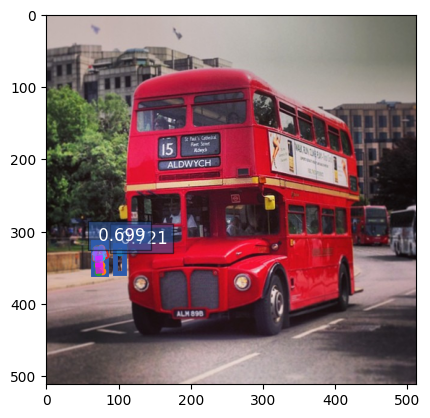

Processing image: 000000482917.jpg
Shape of pre-processed image: (1, 3, 512, 683)


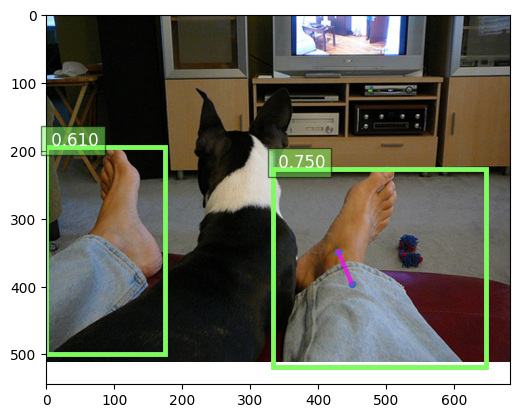

Processing image: 000000285349.jpg
Shape of pre-processed image: (1, 3, 512, 683)
ValueError for image 000000285349.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000311295.jpg
Shape of pre-processed image: (1, 3, 512, 767)
ValueError for image 000000311295.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000232646.jpg
Shape of pre-processed image: (1, 3, 512, 640)
ValueError for image 000000232646.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000284991.jpg
Shape of pre-processed image: (1, 3, 512, 766)


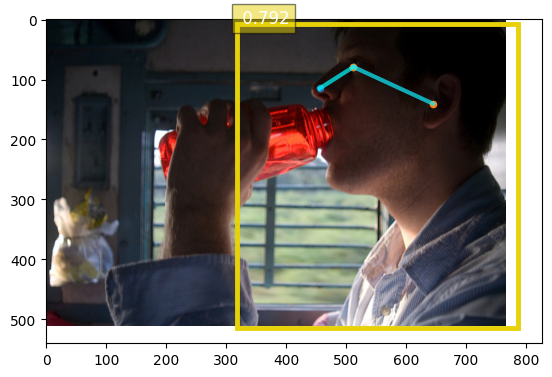

Processing image: 000000297681.jpg
Shape of pre-processed image: (1, 3, 512, 757)
ValueError for image 000000297681.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000020553.jpg
Shape of pre-processed image: (1, 3, 512, 683)
ValueError for image 000000020553.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000459887.jpg
Shape of pre-processed image: (1, 3, 683, 512)
ValueError for image 000000459887.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000166259.jpg
Shape of pre-processed image: (1, 3, 512, 767)
ValueError for image 000000166259.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000411754.jpg
Shape of pre-processed image: (1, 3, 512, 683)


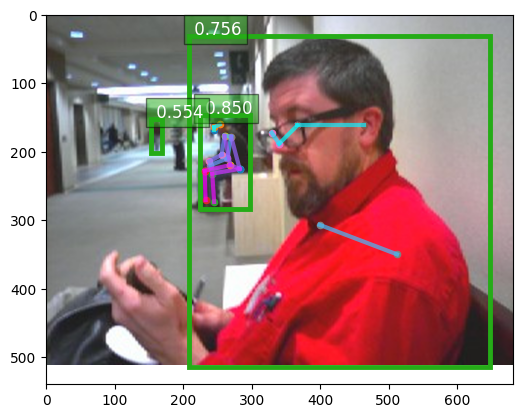

Processing image: 000000579307.jpg
Shape of pre-processed image: (1, 3, 683, 512)


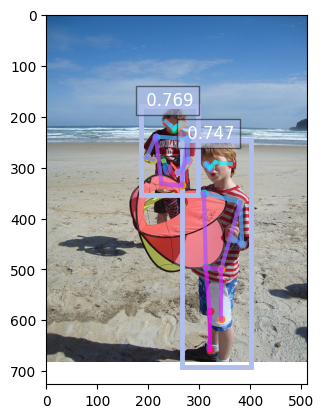

Processing image: 000000336628.jpg
Shape of pre-processed image: (1, 3, 766, 512)


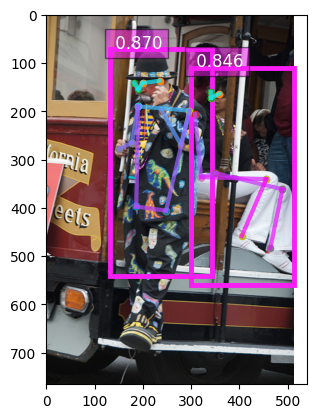

Processing image: 000000565778.jpg
Shape of pre-processed image: (1, 3, 512, 819)


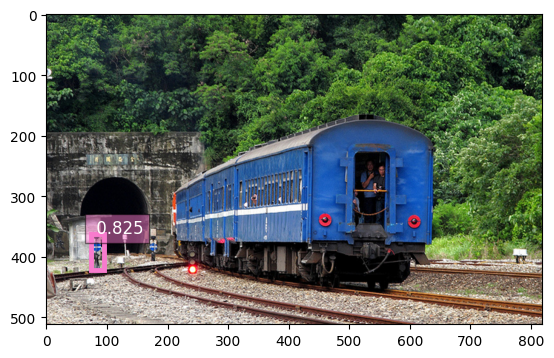

Processing image: 000000023230.jpg
Shape of pre-processed image: (1, 3, 512, 683)
ValueError for image 000000023230.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000323263.jpg
Shape of pre-processed image: (1, 3, 512, 733)


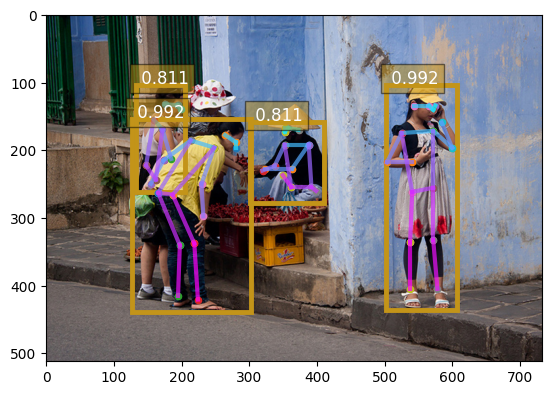

Processing image: 000000153229.jpg
Shape of pre-processed image: (1, 3, 512, 717)


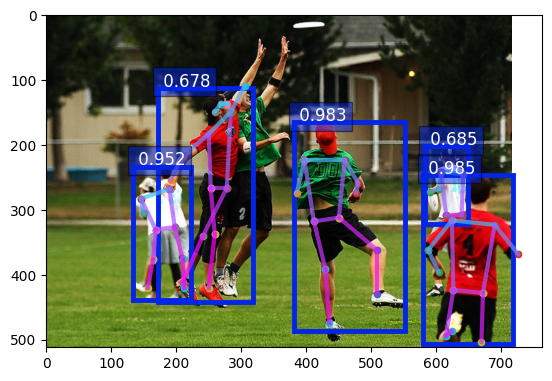

Processing image: 000000425925.jpg
Shape of pre-processed image: (1, 3, 512, 700)
ValueError for image 000000425925.jpg: In HybridBlock, there must be one NDArray or one Symbol in the input. Please check the type of the args.

Processing image: 000000231580.jpg
Shape of pre-processed image: (1, 3, 512, 683)


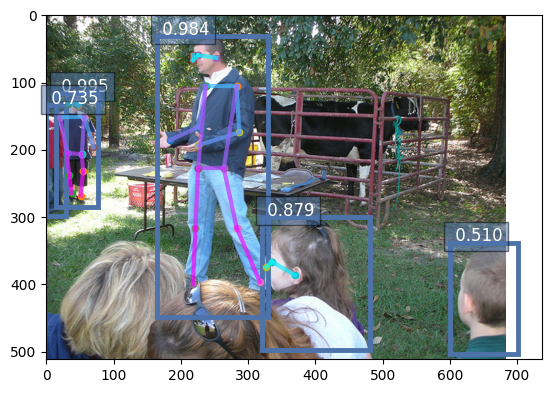

In [16]:
# load the models
detector = model_zoo.get_model('yolo3_mobilenet1.0_coco', pretrained=True)
pose_net = model_zoo.get_model('alpha_pose_resnet101_v1b_coco', pretrained=True)

# detect only persons
detector.reset_class(["person"], reuse_weights=['person'])

# the directory containing images and & display limit
image_dir = './val2017/'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]
display_limit = 10  # you can set it whatever you want

# count the images
display_count = 0

for im_fname in image_files:
    if display_count >= display_limit:
        break

    try:
        # load & preprocess the image
        img_path = os.path.join(image_dir, im_fname)
        x, img = data.transforms.presets.yolo.load_test(img_path, short=512)
        print(f'Processing image: {im_fname}')
        print('Shape of pre-processed image:', x.shape)

        # detect persons in the image
        class_IDs, scores, bounding_boxs = detector(x)

        # perform pose estimation
        if isinstance(x, mx.nd.NDArray):
            pose_input, upscale_bbox = detector_to_alpha_pose(img, class_IDs, scores, bounding_boxs)
            predicted_heatmap = pose_net(pose_input)
            pred_coords, confidence = heatmap_to_coord_alpha_pose(predicted_heatmap, upscale_bbox)

            # visualize the results
            ax = utils.viz.plot_keypoints(img, pred_coords, confidence,
                                          class_IDs, bounding_boxs, scores,
                                          box_thresh=0.5, keypoint_thresh=0.2)
            plt.show()

            # increment the display counter
            display_count += 1
        else:
            print(f'Input is not an NDArray, skipping image: {im_fname}')

    except ValueError as e:
        print(f"ValueError for image {im_fname}: {e}")
    except Exception as e:
        print(f"Unexpected error for image {im_fname}: {e}")